In [1]:
# importing libraries
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from numpy import loadtxt
from numpy import reshape
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics
from keras import backend as K
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import KFold
from matplotlib import pyplot

Using TensorFlow backend.
/home/abilio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abilio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abilio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abilio/anaconda3/lib/python3.7/site-packages/tenso

In [2]:
# setting numpy print option
np.set_printoptions(suppress=True)

In [3]:
# load the dataset
dataset = loadtxt('desharnais.csv', delimiter=',')
print(dataset.shape)

(77, 12)


In [4]:
# selecting input and output for kfold
X = np.delete(dataset, [0,3,5], axis=1)
y = dataset[:,5]

In [5]:
# model estructuration
model = Sequential()
model.add(Dense(64, input_dim=9))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [6]:
# compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mse, metrics.mae])

In [7]:
# kfold split
# model training and evaluation
kf = KFold(n_splits=10)
f = 1
all_train_mse = np.array([])
all_train_mae = np.array([])
all_test_mse = np.array([])
all_test_mae = np.array([])
for train_index, test_index in kf.split(X):
    # defining train and test sets for input and output
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # standardize dataset
    ss = StandardScaler()
    # train standardize
    sclXtrain = ss.fit(X_train)
    X_train = sclXtrain.transform(X_train)
    sclYtrain = ss.fit(y_train.reshape(-1,1))
    y_train = sclYtrain.transform(y_train.reshape(-1,1))

    # test standardize
    sclXtest = ss.fit(X_test)
    X_test = sclXtest.transform(X_test)
    sclYtest = ss.fit(y_test.reshape(-1,1))
    y_test = sclYtest.transform(y_test.reshape(-1,1))
    
    # fit the keras model on the dataset
    model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, verbose=0)
    
    # evaluate the model 3 metrics
    _,train_mse,train_mae = model.evaluate(X_train, y_train, verbose=0)
    _,test_mse,test_mae = model.evaluate(X_test, y_test, verbose=0)
    
    # storing each fold metrics in nparray
    all_train_mse = np.append(all_train_mse,train_mse)
    all_train_mae = np.append(all_train_mae,train_mae)
    all_test_mse = np.append(all_test_mse,test_mse)
    all_test_mae = np.append(all_test_mae,test_mae)
    
    print('FOLD: %d' % f)
    print('TRAIN | mse: %.3f, mae: %.3f' % (train_mse, train_mae))
    print('TEST  | mse: %.3f, mae: %.3f' % (test_mse, test_mae))
    f+=1


FOLD: 1
TRAIN | mse: 0.193, mae: 0.243
TEST  | mse: 0.739, mae: 0.698
FOLD: 2
TRAIN | mse: 0.386, mae: 0.281
TEST  | mse: 1.201, mae: 0.630
FOLD: 3
TRAIN | mse: 0.236, mae: 0.233
TEST  | mse: 1.165, mae: 0.729
FOLD: 4
TRAIN | mse: 0.762, mae: 0.319
TEST  | mse: 1.524, mae: 0.979
FOLD: 5
TRAIN | mse: 1.269, mae: 0.370
TEST  | mse: 0.887, mae: 0.735
FOLD: 6
TRAIN | mse: 2.723, mae: 0.477
TEST  | mse: 0.464, mae: 0.486
FOLD: 7
TRAIN | mse: 0.667, mae: 0.309
TEST  | mse: 0.811, mae: 0.597
FOLD: 8
TRAIN | mse: 1.512, mae: 0.361
TEST  | mse: 0.579, mae: 0.502
FOLD: 9
TRAIN | mse: 2.145, mae: 0.382
TEST  | mse: 3.498, mae: 0.853
FOLD: 10
TRAIN | mse: 0.141, mae: 0.192
TEST  | mse: 0.434, mae: 0.542


In [9]:
mean_mse_train = np.mean(all_train_mse)
mean_mae_train = np.mean(all_train_mae)
mean_mse_test = np.mean(all_test_mse)
mean_mae_test = np.mean(all_test_mae)

print('MLP TRAIN METRICS MEAN AFTER 10 FOLDS')
print('MSE: %.3f | MAE: %.3f' % (mean_mse_train, mean_mae_train))
print('MLP TEST METRICS MEAN AFTER 10 FOLDS')
print('MSE: %.3f | MAE: %.3f' % (mean_mse_test, mean_mae_test))

MLP TRAIN METRICS MEAN AFTER 10 FOLDS
MSE: 1.003 | MAE: 0.317
MLP TEST METRICS MEAN AFTER 10 FOLDS
MSE: 1.130 | MAE: 0.675


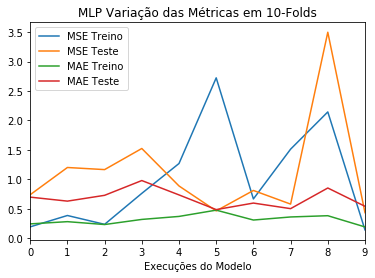

In [10]:
# plot mlp metrics variation
pyplot.title('MLP Variação das Métricas em 10-Folds')
pyplot.plot(all_train_mse, label='MSE Treino')
pyplot.plot(all_test_mse, label='MSE Teste')
pyplot.plot(all_train_mae, label='MAE Treino')
pyplot.plot(all_test_mae, label='MAE Teste')
pyplot.xlim(0,9)
pyplot.xlabel("Execuções do Modelo")
pyplot.legend()
pyplot.show()